## Exploratory Data Analysis

In [ ]:
# Import pandas
import pandas as pd

# read data into pandas dataframe
df = pd.read_csv("./data/merged_excel_data.csv", low_memory=False)

In [ ]:
# Process data to contain rows with the most data. 
# This was used instead of removing rows with missing 
# data because only ~1000 rows would be left which would 
# not be enough for training the model and making good predictions

# Note: This is a manual process, you have to check which rows exist 
# within your data file and adjust the ones here
df_part1 = df.iloc[0:45]
df_part2 = df.iloc[52745:65110]

# Combine extracted data and reset indices
new_df = pd.concat([df_part1, df_part2])
new_df.reset_index(drop=True, inplace=True)

# Save modified dataframe
new_df.to_csv("./data/cleaned_data.csv", index=False)

In [ ]:
# Read cleand_data into pandas dataframes
stats = pd.read_csv("./data/cleaned_data.csv", low_memory=False)

In [22]:
# Check for null/missing values
# Note: Numbet of missing values is reduced here from 
# > 50K to 1712 max which is good because it means that most 
# of the data is useful
pd.isnull(stats).sum()

Player         1
Age            2
Team           2
Pos            2
G              2
GS             2
MP             2
FG             2
FGA            2
FG%           56
3P             2
3PA            2
3P%         1712
2P             2
2PA            2
2P%           99
eFG%          56
FT             2
FTA            2
FT%          485
ORB            2
DRB            2
TRB            2
AST            2
STL            2
BLK            2
TOV            2
PF             2
PTS            2
Awards     10769
Year           1
Pts Won        0
Pts Max        0
Share          0
W           1444
L           1444
W/L%        1444
GB          1444
PS/G        1444
PA/G        1444
SRS         1444
dtype: int64

In [ ]:
# Fill missing values with 0
stats.fillna(0, inplace=True)

In [32]:
# Check for missing values
pd.isnull(stats).sum()

Player     0
Age        0
Team       0
Pos        0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Awards     0
Year       0
Pts Won    0
Pts Max    0
Share      0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64

In [28]:
# Check size of the dataframe
stats.shape

(12410, 41)

In [31]:
# Check for unique playesr in the dataframe
stats["Player"].unique

<bound method Series.unique of 0                A.C. Green
1           Cedric Ceballos
2           Charles Barkley
3               Dan Majerle
4               Danny Ainge
                ...        
12405           Josh Okogie
12406    Karl-Anthony Towns
12407          Kelan Martin
12408              Naz Reid
12409        League Average
Name: Player, Length: 12410, dtype: object>

In [12]:
# Get the history of the top 10 highest scoring players
highest_scoring = stats[stats["G"] > 70].sort_values("PTS", ascending=False).head(10)
highest_scoring

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,Pts Won,Pts Max,Share,W,L,W/L%,GB,PS/G,PA/G,SRS
11022,James Harden,29.0,Housten Rockets,PG,78.0,78.0,36.8,10.8,24.5,0.442,...,776.0,1010.0,0.768,0.0,0.0,0.000,0.0,0.0,0.0,0.00
806,Kobe Bryant,27.0,Los Angeles Lakers,SG,80.0,80.0,41.0,12.2,27.2,0.450,...,483.0,1250.0,0.386,45.0,37.0,0.549,9.0,99.4,96.9,2.53
3646,Allen Iverson,30.0,Philadelphia 76ers,PG,72.0,72.0,43.1,11.3,25.3,0.447,...,1.0,1250.0,0.001,38.0,44.0,0.463,11.0,99.4,101.3,-2.10
5720,Tracy McGrady,23.0,Orlando Magic,SG,75.0,74.0,39.4,11.1,24.2,0.457,...,427.0,1190.0,0.359,42.0,40.0,0.512,7.0,98.5,98.4,-0.39
5259,Kevin Durant,25.0,Oklahoma City Thunder,SF,81.0,81.0,38.5,10.5,20.8,0.503,...,1232.0,1250.0,0.986,59.0,23.0,0.720,0.0,106.2,99.8,6.66
820,Kobe Bryant,28.0,Los Angeles Lakers,SG,77.0,77.0,40.8,10.6,22.8,0.463,...,521.0,1290.0,0.404,42.0,40.0,0.512,19.0,103.3,103.4,0.24
5303,Russell Westbrook,28.0,Oklahoma City Thunder,PG,81.0,81.0,34.6,10.2,24.0,0.425,...,888.0,1010.0,0.879,47.0,35.0,0.573,4.0,106.6,105.8,1.14
2669,LeBron James,21.0,Cleveland Cavaliers,SF,79.0,79.0,42.5,11.1,23.1,0.480,...,688.0,1250.0,0.550,50.0,32.0,0.610,14.0,97.6,95.4,2.17
736,Allen Iverson,25.0,Philadelphia 76ers,SG,71.0,71.0,42.0,10.7,25.5,0.420,...,1121.0,1240.0,0.904,56.0,26.0,0.683,0.0,94.7,90.4,3.64
790,Allen Iverson,29.0,Philadelphia 76ers,PG,75.0,75.0,42.3,10.3,24.2,0.424,...,240.0,1270.0,0.189,43.0,39.0,0.524,2.0,99.1,99.9,-1.07


<Axes: xlabel='Player'>

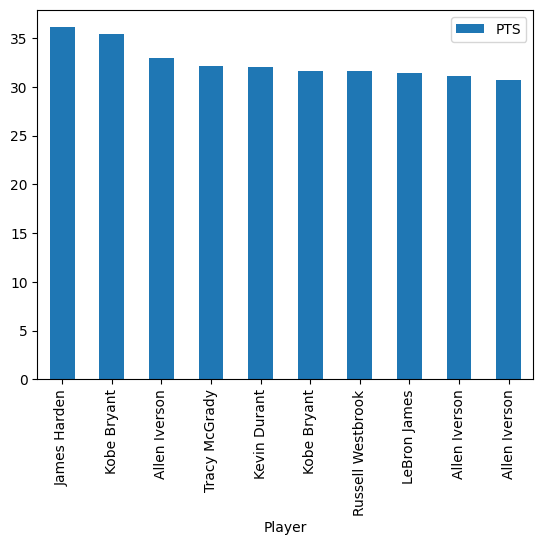

In [13]:
# Plot the data in a bar plot
highest_scoring.plot.bar("Player", "PTS")

In [14]:
# Get the player with the most points in each year
player_data = stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))
player_data.head()

,,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,Pts Won,Pts Max,Share,W,L,W/L%,GB,PS/G,PA/G,SRS
Year,,,,,,,,,,,,,,,,,,,,,,
0.0,44,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.000,...,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.00
1994.0,7196,David Robinson,28.0,San Antonio Spurs,C,80.0,80.0,40.5,10.5,20.7,0.507,...,730.0,1010.0,0.723,55.0,27.0,0.671,3.0,100.0,94.8,5.05
1995.0,6101,Shaquille O'Neal,22.0,Orlando Magic,C,79.0,79.0,37.0,11.8,20.2,0.583,...,605.0,1050.0,0.576,57.0,25.0,0.695,0.0,110.9,103.8,6.44
1996.0,8750,Michael Jordan,32.0,Chicago Bulls,SG,82.0,82.0,37.7,11.2,22.6,0.495,...,1114.0,1130.0,0.986,72.0,10.0,0.878,0.0,105.2,92.9,11.80
1997.0,8764,Michael Jordan,33.0,Chicago Bulls,SG,82.0,82.0,37.9,11.2,23.1,0.486,...,957.0,1150.0,0.832,69.0,13.0,0.841,0.0,103.1,92.3,10.70


<Axes: xlabel='Year'>

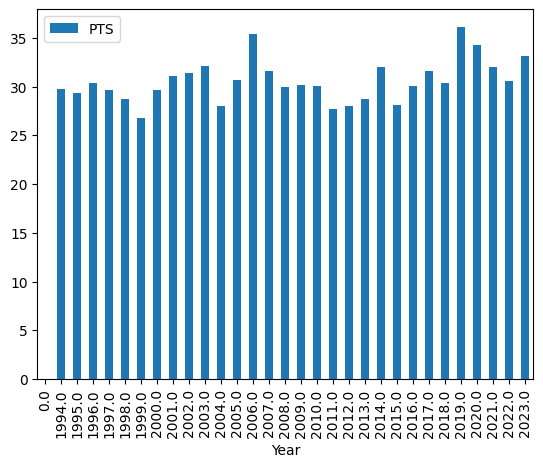

In [15]:
# Plot the data in a bar plot
player_data.plot.bar("Year", "PTS")

In [16]:
# Compute correlations for the numeric columsn with the Share column
stats.select_dtypes(include=["number"]).corr()["Share"]

Age        0.021721
G          0.089451
GS         0.166472
MP         0.161376
FG         0.274869
FGA        0.248749
FG%        0.060094
3P         0.092018
3PA        0.092096
3P%        0.029365
2P         0.278756
2PA        0.256817
2P%        0.053467
eFG%       0.051695
FT         0.325382
FTA        0.332833
FT%        0.038934
ORB        0.097374
DRB        0.214198
TRB        0.186608
AST        0.200450
STL        0.167791
BLK        0.154407
TOV        0.237407
PF         0.071969
PTS        0.287579
Year      -0.004830
Pts Won    0.996019
Pts Max    0.527507
Share      1.000000
W          0.066202
L         -0.085744
W/L%       0.067053
GB        -0.086679
PS/G      -0.009011
PA/G      -0.023579
SRS        0.109888
Name: Share, dtype: float64

<Axes: >

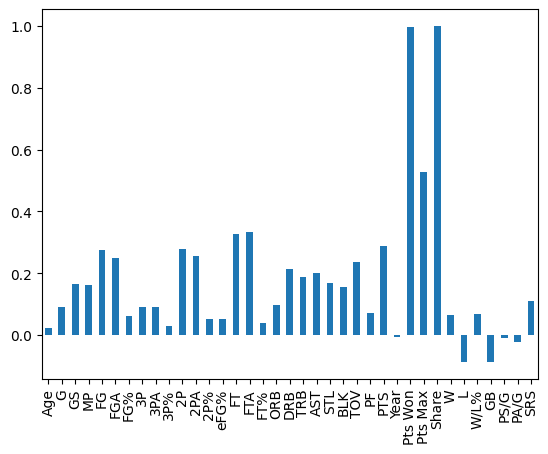

In [17]:
# Plot correlation values
stats.select_dtypes(include=["number"]).corr()["Share"].plot.bar()

In [18]:
stats.to_csv("./data/cleaned_data_for_ml.csv", index=False)